<a href="https://colab.research.google.com/github/SurajGusain0007/Machine_learning_projects/blob/main/Medical_Insurance_Cost_Prediction_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing *libraries*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Data Collection and Analysis

In [4]:
insurance_data=pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
#First five rows of the datafrmae
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#no of rows and columns
insurance_data.shape

(1338, 7)

In [7]:
#getting ome information about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Categorical features

*   Sex
*   Smoker
*   Region






In [9]:
#check for missing value
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [10]:
#stastistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


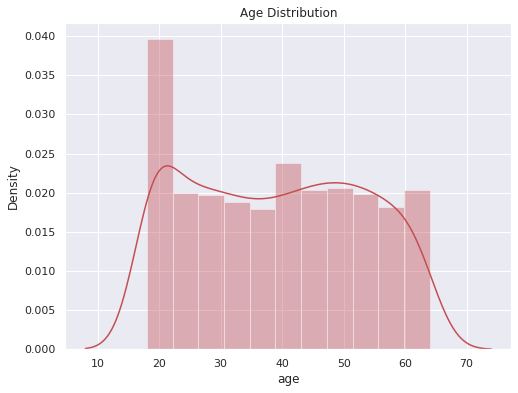

In [19]:
#distribution of age value
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(insurance_data['age'],color='r')
plt.title("Age Distribution")
plt.show()

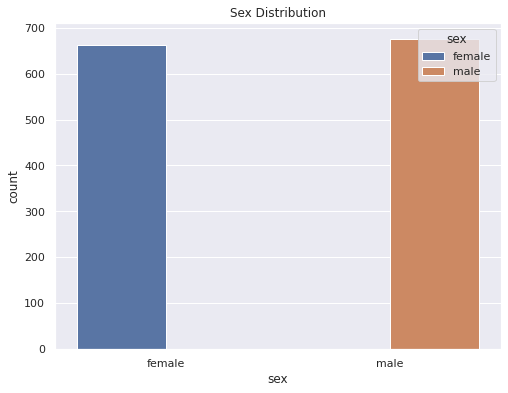

In [22]:
#Gender column
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=insurance_data,hue='sex')
plt.title("Sex Distribution")
plt.show()

In [23]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


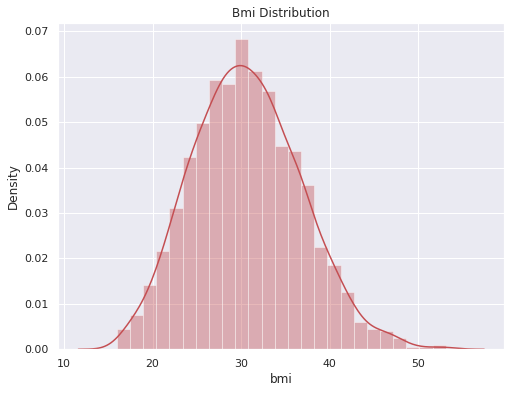

In [24]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(insurance_data['bmi'],color='r')
plt.title("Bmi Distribution")
plt.show()

**#normal bmi range -->18.5 to 24.5**

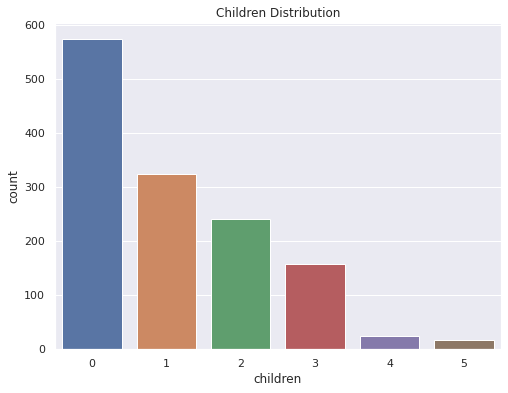

In [26]:
#Children column
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=insurance_data)
plt.title("Children Distribution")
plt.show()

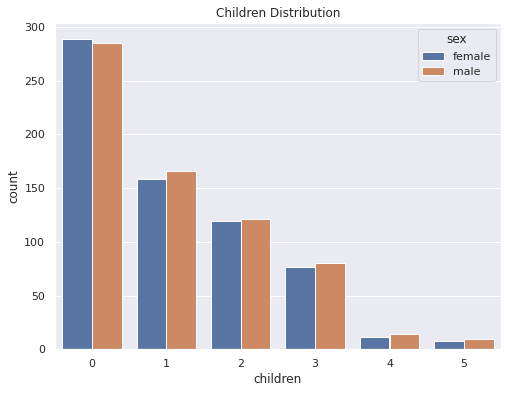

In [27]:
#Children column
plt.figure(figsize=(8,6))
sns.countplot(x='children',data=insurance_data,hue='sex')
plt.title("Children Distribution")
plt.show()

In [28]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

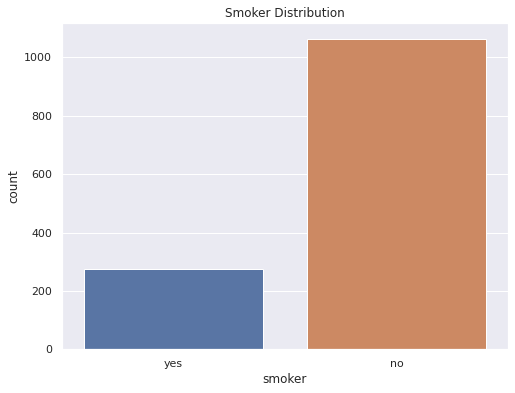

In [29]:
#Smoker column
plt.figure(figsize=(8,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title("Smoker Distribution")
plt.show()

In [30]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

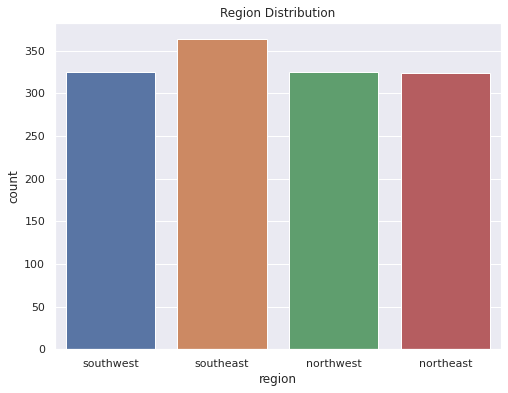

In [31]:
#Region column
plt.figure(figsize=(8,6))
sns.countplot(x='region',data=insurance_data)
plt.title("Region Distribution")
plt.show()

In [32]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


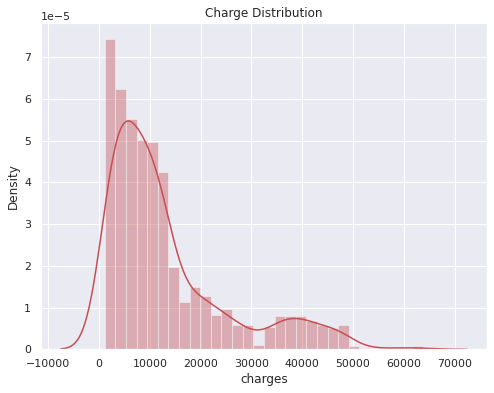

In [33]:
#distribution of bmi value
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(insurance_data['charges'],color='r')
plt.title("Charge Distribution")
plt.show()

#Data Preprocessing

**Encoding the categorical features**

In [39]:
#encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
3.
4.#encoding smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#5.encoding region column
insurance_data.replace({'region':{'southeast':0,'northeast':2,'northwest':3,'southwest':1}},inplace=True)

In [41]:
#New dataframe 
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Splitting the features and target

In [51]:
x=insurance_data.iloc[:,:6].values
y=insurance_data.iloc[:,-1].values

# Splitting the data into training data and testing data

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [56]:
print(x.shape,X_train.shape,X_test.shape)

(1338, 6) (936, 6) (402, 6)


#Training our model

In [57]:
#linear regression model
lr=LinearRegression()

In [58]:
lr.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

In [62]:
#prediction of training data
training_data_prediction=lr.predict(X_train)

In [63]:
#R2 square value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print("R squared value :",r2_train)

R squared value : 0.7541288505323116


In [64]:
#prediction on test data
test_data_prediction=lr.predict(X_test)

In [68]:
#R2 square value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print("R square value",r2_test)

R square value 0.7397250964731418


#Building a predictive system

In [75]:
input_data=(31,1,25.74,0,1,0)

#chsanging input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=lr.predict(input_data_reshape)

print(prediction)

print("The insurance cost is",prediction[0])




[3934.90979187]
The insurance cost is 3934.9097918712723
